In [18]:
import pandas as pd

data = pd.read_excel('Financial Sample.xlsx')

In [20]:
data

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014


In [21]:
data.shape

(700, 16)

In [22]:
data.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [23]:
data_subsets = data[['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year']]

In [24]:
data_subsets.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price             int64
Sale Price                      int64
Gross Sales                   float64
Discounts                     float64
 Sales                        float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Year                            int64
dtype: object

In [47]:
data.rename(columns = {'Units Sold':'UnitsSold', 'Manufacturing Price':'ManufacturingPrice'}, inplace = True)

In [49]:
data.ManufacturingPrice.value_counts()

10     202
120    109
250    109
260     94
3       93
5       93
Name: ManufacturingPrice, dtype: int64

In [50]:
data[['ManufacturingPrice']] = data[['ManufacturingPrice']].replace([10],'Middle')
data[['ManufacturingPrice']] = data[['ManufacturingPrice']].replace([120],'Midhigh')
data[['ManufacturingPrice']] = data[['ManufacturingPrice']].replace([250],'High')
data[['ManufacturingPrice']] = data[['ManufacturingPrice']].replace([260],'Highest')
data[['ManufacturingPrice']] = data[['ManufacturingPrice']].replace([3],'Lower')
data[['ManufacturingPrice']] = data[['ManufacturingPrice']].replace([5],'Low')

In [53]:
new_data = data.ManufacturingPrice.value_counts()

In [54]:
new_data

Middle     202
High       109
Midhigh    109
Highest     94
Lower       93
Low         93
Name: ManufacturingPrice, dtype: int64

In [55]:
new_data.to_excel('new_data.xlsx')

In [59]:
mPrice = pd.read_excel('new_data.xlsx')

In [60]:
mPrice

,Unnamed: 0,ManufacturingPrice
0,Middle,202
1,High,109
2,Midhigh,109
3,Highest,94
4,Lower,93
5,Low,93


In [62]:
data[['Segment','Country','Product','ManufacturingPrice']]

,Segment,Country,Product,ManufacturingPrice
0,Government,Canada,Carretera,Lower
1,Government,Germany,Carretera,Lower
2,Midmarket,France,Carretera,Lower
3,Midmarket,Germany,Carretera,Lower
4,Midmarket,Mexico,Carretera,Lower
...,...,...,...,...
695,Small Business,France,Amarilla,Highest
696,Small Business,Mexico,Amarilla,Highest
697,Government,Mexico,Montana,Low
698,Government,Canada,Paseo,Middle


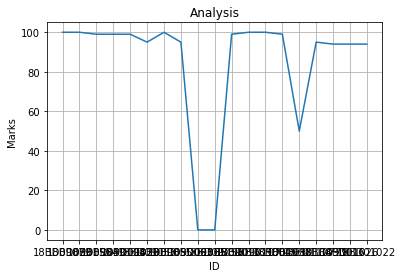

In [66]:
import matplotlib.pyplot as plt

plt.plot(data['ID студента'],data['Оценка'])
plt.title('Analysis')
plt.xlabel('ID')
plt.ylabel('Marks')
plt.grid(True)
plt.show()

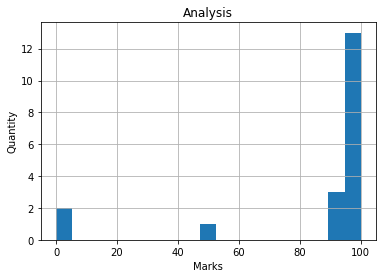

In [65]:
plt.hist(data['Оценка'],len(data['ID студента']))
plt.title('Analysis')
plt.xlabel('Marks')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

In [80]:
import numpy as np

marks = data['Оценка'].to_numpy()
marks

array([100, 100,  99,  99,  99,  95, 100,  95,   0,   0,  99, 100, 100,
        99,  50,  95,  94,  94,  94], dtype=int64)

In [84]:
a = np.where(marks<=50, 'Fail', 'Pass' )

In [89]:
np.count_nonzero(a=='Fail')

3

In [99]:
data.Оценка.value_counts()

TypeError: 'Series' object is not callable

# Drawing

In [107]:
import matplotlib

In [108]:
plt.scatter?  #info

In [ ]:
plt.